In [7]:
def compression(img, perc):
    
    fft_img = np.fft.fft2(img)
    
    fft_sorted = np.sort(np.abs(fft_img.reshape(-1)))
    
    thresh = fft_sorted[int(np.floor((1 - perc) * len(fft_sorted)))]
    
    small_indices = np.abs(fft_img) > thresh
    
    high_values_image = small_indices * fft_img
    
    compressed_image=np.fft.ifft2(high_values_image).real
    
    return compressed_image

In [8]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread 
import matplotlib.pyplot as plt
import os
from skimage import color
from skimage import io
from skimage.exposure import rescale_intensity
from skimage.color import rgb2gray

In [9]:
PATH = os.getcwd()
print("Enter file name: \n")

file = input()

image = io.imread(file)

Enter file name: 

pic1.jpg


In [10]:
print('Enter the compression rate (value must be (0, 1)) (i.e. the percentage of frequencies you want to keep) \n')

rate = input()
rate = float(rate)

while(rate > 1.0 or rate < 0.0):
    
    print('\nEnter a valid value (greater than 0 and smaller than 1) \n')
    rate = input()
    rate = float(rate)

print('\nValue entered succesfully \n')    

Enter the compression rate (value must be (0, 1)) (i.e. the percentage of frequencies you want to keep) 

0.001

Value entered succesfully 



In [11]:
print('Enter 1 for colored image copression, 2 for gray scale image compression \n')

mod = input()
mod = float(mod)

while(mod != 1.0 and mod !=  2.0):
    
    print('\nEnter a valid value (1 or 2) \n')
    mod = input()

print('\nValue entered succesfully \n')

Enter 1 for colored image copression, 2 for gray scale image compression 

1

Value entered succesfully 



Full res image size is: 4566.09765625 Kb

Compressed image size is: 560.21484375 Kb


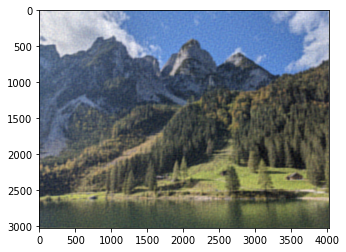

In [12]:
if(mod == 1.0):

    #splitting the image in 3 different layers (red, green, blue)
    red = image[:, :, 0]
    green = image[:, :, 1]
    blue = image[:, :, 2]

    red_c = compression(red, rate)
    green_c = compression(green, rate)
    blue_c = compression(blue, rate)
    image_c = rescale_intensity((np.dstack((red_c, green_c, blue_c)))/255, out_range = (0, 1))
    plt.imshow(image_c)
    file1 = 'compressed_image_colour' + str(rate * 100) + '%.jpg'
    plt.imsave(file1, image_c)
    print(f'Full res image size is: {(os.stat(file).st_size/1024)} Kb')
    print(f'\nCompressed image size is: {os.stat(file1).st_size/1024} Kb')
    
elif(mod == 2.0):
    
    image_g = io.imread(file, as_gray = True)
    image_c = compression(image_g, rate)
    file1 = 'temp.jpg'
    plt.imsave(file1, image_g)
    print(f"\nGray scale image size is: {os.stat(file1).st_size/1024} Kb")
    os.remove(file1)
    plt.imshow(image_c, cmap = 'gray')
    plt.imsave('compressed_image_gray' + str(rate * 100) + '%.jpg', image_c, cmap = 'gray')
    file2 = 'compressed_image_gray' + str(rate * 100) + '%.jpg'
    print(f"\nCompressed image size is: {os.stat(file2).st_size/1024} Kb")